<font size="5">PROJECT TITLE: E-commerce Sales Detective: Uncovering Trends & Customer Insights

In [299]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

In [300]:
sales = pd.read_csv("TDI online_sales_dataset2.csv")

In [301]:
sales.head()

,InvoiceNo,Stock Code,Description,Quantity,Invoice Date,Invoice Time,Unit Price,Customer ID,Country,Discount,Payment Method,Shipping Cost,Category,Sales Channel,Return Status,Shipment Provider,Warehouse Location,Order Priority
0,221958,SKU_1964,White Mug,38,1/1/2020,12:00 AM,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,1/1/2020,1:00 AM,41.25,19144.0,Spain,0.19,Paypal,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,1/1/2020,2:00 AM,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,1/1/2020,3:00 AM,76.68,96586.0,Netherlands,0.14,Paypal,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,1/1/2020,4:00 AM,-68.11,NaN,United Kingdom,1.50,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [302]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   InvoiceNo           49782 non-null  int64  
 1   Stock Code          49782 non-null  object 
 2   Description         49782 non-null  object 
 3   Quantity            49782 non-null  int64  
 4   Invoice Date        49782 non-null  object 
 5   Invoice Time        49782 non-null  object 
 6   Unit Price          49782 non-null  float64
 7   Customer ID         44804 non-null  float64
 8   Country             49782 non-null  object 
 9   Discount            49782 non-null  float64
 10  Payment Method      49782 non-null  object 
 11  Shipping Cost       47293 non-null  float64
 12  Category            49782 non-null  object 
 13  Sales Channel       49782 non-null  object 
 14  Return Status       49782 non-null  object 
 15  Shipment Provider   49782 non-null  object 
 16  Ware

In [303]:
sales.describe()

,InvoiceNo,Quantity,Unit Price,Customer ID,Discount,Shipping Cost
count,49782.000000,49782.000000,49782.000000,44804.000000,49782.000000,47293.000000
mean,550681.239946,22.372343,47.537862,55032.871775,0.275750,17.494529
std,260703.009944,17.917774,33.479510,25913.660157,0.230086,7.220557
min,100005.000000,-50.000000,-99.980000,10001.000000,0.000000,5.000000
25%,324543.000000,11.000000,23.592500,32750.750000,0.130000,11.220000
50%,552244.000000,23.000000,48.920000,55165.000000,0.260000,17.500000
75%,776364.000000,37.000000,74.610000,77306.250000,0.380000,23.720000
max,999997.000000,49.000000,100.000000,99998.000000,2.000000,30.000000


In [304]:
sales.isnull().sum()

InvoiceNo                0
Stock Code               0
Description              0
Quantity                 0
Invoice Date             0
Invoice Time             0
Unit Price               0
Customer ID           4978
Country                  0
Discount                 0
Payment Method           0
Shipping Cost         2489
Category                 0
Sales Channel            0
Return Status            0
Shipment Provider        0
Warehouse Location    3485
Order Priority           0
dtype: int64

In [305]:
sales.duplicated().sum()

0

In [306]:
sales[sales.isnull().any(axis=1)]

,InvoiceNo,Stock Code,Description,Quantity,Invoice Date,Invoice Time,Unit Price,Customer ID,Country,Discount,Payment Method,Shipping Cost,Category,Sales Channel,Return Status,Shipment Provider,Warehouse Location,Order Priority
4,359178,SKU_1386,USB Cable,-30,1/1/2020,4:00 AM,-68.11,NaN,United Kingdom,1.50,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
49,655839,SKU_1047,Office Chair,48,1/3/2020,1:00 AM,4.74,NaN,Belgium,0.22,Credit Card,23.11,Accessories,Online,Not Returned,UPS,London,High
62,305041,SKU_1731,Desk Lamp,45,1/3/2020,2:00 PM,54.79,NaN,United Kingdom,0.23,Credit Card,8.97,Accessories,In-store,Not Returned,DHL,NaN,Medium
71,672843,SKU_1953,Headphones,3,1/3/2020,11:00 PM,99.17,NaN,United States,0.03,Paypal,11.58,Stationery,Online,Not Returned,DHL,London,Medium
103,124300,SKU_1951,Headphones,8,1/5/2020,7:00 AM,46.19,NaN,Norway,0.10,Bank Transfer,12.81,Stationery,In-store,Not Returned,UPS,NaN,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49739,106493,SKU_1736,Desk Lamp,-40,9/3/2025,11:00 AM,-51.34,NaN,Netherlands,0.23,Bank Transfer,NaN,Accessories,In-store,Not Returned,FedEx,NaN,Medium
49749,540459,SKU_1405,White Mug,-36,9/3/2025,9:00 PM,12.21,NaN,Portugal,0.29,Paypal,NaN,Stationery,Online,Not Returned,UPS,NaN,High
49760,726763,SKU_1273,White Mug,-34,9/4/2025,8:00 AM,10.34,NaN,France,0.35,Credit Card,NaN,Furniture,Online,Not Returned,DHL,NaN,High
49761,829071,SKU_1000,Wall Clock,1,9/4/2025,9:00 AM,27.81,NaN,Sweden,0.39,Bank Transfer,7.40,Apparel,In-store,Not Returned,DHL,NaN,Low


In [307]:
column_data = sales[['Customer ID', 'Shipping Cost', 'Warehouse Location']] #created a variable for columns with null value

In [308]:
column_data

,Customer ID,Shipping Cost,Warehouse Location
0,37039.0,10.79,London
1,19144.0,9.51,Rome
2,50472.0,23.03,Berlin
3,96586.0,11.08,Rome
4,NaN,NaN,NaN
...,...,...,...
49777,51445.0,8.96,Berlin
49778,28879.0,23.55,Amsterdam
49779,21825.0,16.26,London
49780,43199.0,28.56,London


In [309]:
column_data[column_data.isnull().any(axis=1)]

,Customer ID,Shipping Cost,Warehouse Location
4,NaN,NaN,NaN
49,NaN,23.11,London
62,NaN,8.97,NaN
71,NaN,11.58,London
103,NaN,12.81,NaN
...,...,...,...
49739,NaN,NaN,NaN
49749,NaN,NaN,NaN
49760,NaN,NaN,NaN
49761,NaN,7.40,NaN


In [310]:
neg_qtys = sales[sales['Quantity'] < 0] #created a variable for all the quatites that are negative value 

In [311]:
neg_qtys

,InvoiceNo,Stock Code,Description,Quantity,Invoice Date,Invoice Time,Unit Price,Customer ID,Country,Discount,Payment Method,Shipping Cost,Category,Sales Channel,Return Status,Shipment Provider,Warehouse Location,Order Priority
4,359178,SKU_1386,USB Cable,-30,1/1/2020,4:00 AM,-68.11,NaN,United Kingdom,1.50,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
144,451279,SKU_1617,Wall Clock,-2,1/7/2020,12:00 AM,34.06,NaN,Spain,0.34,Credit Card,NaN,Furniture,Online,Not Returned,DHL,NaN,Medium
147,747972,SKU_1514,Desk Lamp,-26,1/7/2020,3:00 AM,-72.33,NaN,Netherlands,1.97,Paypal,NaN,Electronics,In-store,Not Returned,Royal Mail,NaN,Low
167,318969,SKU_1115,Desk Lamp,-19,1/7/2020,11:00 PM,-3.61,NaN,Italy,1.05,Credit Card,NaN,Apparel,In-store,Not Returned,UPS,NaN,High
176,285340,SKU_1710,Blue Pen,-3,1/8/2020,8:00 AM,85.95,NaN,Netherlands,0.26,Credit Card,NaN,Accessories,In-store,Not Returned,UPS,NaN,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49730,487771,SKU_1083,Wall Clock,-7,9/3/2025,2:00 AM,-57.31,NaN,United Kingdom,1.14,Paypal,NaN,Accessories,Online,Not Returned,DHL,NaN,Low
49739,106493,SKU_1736,Desk Lamp,-40,9/3/2025,11:00 AM,-51.34,NaN,Netherlands,0.23,Bank Transfer,NaN,Accessories,In-store,Not Returned,FedEx,NaN,Medium
49749,540459,SKU_1405,White Mug,-36,9/3/2025,9:00 PM,12.21,NaN,Portugal,0.29,Paypal,NaN,Stationery,Online,Not Returned,UPS,NaN,High
49760,726763,SKU_1273,White Mug,-34,9/4/2025,8:00 AM,10.34,NaN,France,0.35,Credit Card,NaN,Furniture,Online,Not Returned,DHL,NaN,High


In [312]:
sales['IsReturn'] = sales['Quantity'].apply(lambda x: 'Yes' if x < 0 else 'No') #created a new column 'IsReturn'
#sales['Quantity'] = sales['Quantity'].abs()
sales

,InvoiceNo,Stock Code,Description,Quantity,Invoice Date,Invoice Time,Unit Price,Customer ID,Country,Discount,Payment Method,Shipping Cost,Category,Sales Channel,Return Status,Shipment Provider,Warehouse Location,Order Priority,IsReturn
0,221958,SKU_1964,White Mug,38,1/1/2020,12:00 AM,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,No
1,771155,SKU_1241,White Mug,18,1/1/2020,1:00 AM,41.25,19144.0,Spain,0.19,Paypal,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium,No
2,231932,SKU_1501,Headphones,49,1/1/2020,2:00 AM,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,No
3,465838,SKU_1760,Desk Lamp,14,1/1/2020,3:00 AM,76.68,96586.0,Netherlands,0.14,Paypal,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low,No
4,359178,SKU_1386,USB Cable,-30,1/1/2020,4:00 AM,-68.11,NaN,United Kingdom,1.50,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,9/5/2025,1:00 AM,70.92,51445.0,Spain,0.20,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium,No
49778,296698,SKU_1930,USB Cable,7,9/5/2025,2:00 AM,51.74,28879.0,United States,0.23,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low,No
49779,177622,SKU_1766,Office Chair,43,9/5/2025,3:00 AM,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High,No
49780,701213,SKU_1602,Notebook,48,9/5/2025,4:00 AM,39.64,43199.0,United Kingdom,0.31,Paypal,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium,No


In [313]:
sales['Customer ID'].fillna(0, inplace=True) #fill the null values in customerID with 0

C:\Users\PC\AppData\Local\Temp\ipykernel_556\3517009347.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales['Customer ID'].fillna(0, inplace=True) #fill the null values in customerID with 0


In [314]:
sales['Shipping Cost'].fillna(0, inplace=True) #fill the null values in shipping cost with 0

C:\Users\PC\AppData\Local\Temp\ipykernel_556\2113026841.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales['Shipping Cost'].fillna(0, inplace=True) #fill the null values in shipping cost with 0


In [315]:
sales['Warehouse Location'].fillna('Unkwown', inplace=True) #fill the null values in warehouse location with unknown

C:\Users\PC\AppData\Local\Temp\ipykernel_556\3022964562.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales['Warehouse Location'].fillna('Unkwown', inplace=True) #fill the null values in warehouse location with unknown


In [316]:
sales.isnull().sum() #check for null values

InvoiceNo             0
Stock Code            0
Description           0
Quantity              0
Invoice Date          0
Invoice Time          0
Unit Price            0
Customer ID           0
Country               0
Discount              0
Payment Method        0
Shipping Cost         0
Category              0
Sales Channel         0
Return Status         0
Shipment Provider     0
Warehouse Location    0
Order Priority        0
IsReturn              0
dtype: int64

In [317]:
# I mapped product description to their corresponding categories 
Category_mapping = {
    'Backpack': 'Accessories' , 
    'Blue Pen' : 'Stationery', 
    'Desk Lamp' : 'Electronics', 
    'Headphones' : 'Accessories', 
    'Notebook' : 'Stationery', 
    'Office Chair' : 'Furniture',
    'T-shirt' : 'Apparel', 
    'USB Cable' : 'Accessories', 
    'Wall Clock' : 'Accessories', 
    'White Mug' : 'Accessories', 
    'Wireless Mouse' : 'Accessories'
}

In [318]:
df = pd.DataFrame(sales)

In [319]:
df["Corrected_Category"] = df["Description"].map(Category_mapping) #created a new column for the corrected category

In [320]:
df

,InvoiceNo,Stock Code,Description,Quantity,Invoice Date,Invoice Time,Unit Price,Customer ID,Country,Discount,Payment Method,Shipping Cost,Category,Sales Channel,Return Status,Shipment Provider,Warehouse Location,Order Priority,IsReturn,Corrected_Category
0,221958,SKU_1964,White Mug,38,1/1/2020,12:00 AM,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,No,Accessories
1,771155,SKU_1241,White Mug,18,1/1/2020,1:00 AM,41.25,19144.0,Spain,0.19,Paypal,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium,No,Accessories
2,231932,SKU_1501,Headphones,49,1/1/2020,2:00 AM,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,No,Accessories
3,465838,SKU_1760,Desk Lamp,14,1/1/2020,3:00 AM,76.68,96586.0,Netherlands,0.14,Paypal,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low,No,Electronics
4,359178,SKU_1386,USB Cable,-30,1/1/2020,4:00 AM,-68.11,0.0,United Kingdom,1.50,Bank Transfer,0.00,Electronics,In-store,Not Returned,FedEx,Unkwown,Medium,Yes,Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,9/5/2025,1:00 AM,70.92,51445.0,Spain,0.20,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium,No,Stationery
49778,296698,SKU_1930,USB Cable,7,9/5/2025,2:00 AM,51.74,28879.0,United States,0.23,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low,No,Accessories
49779,177622,SKU_1766,Office Chair,43,9/5/2025,3:00 AM,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High,No,Furniture
49780,701213,SKU_1602,Notebook,48,9/5/2025,4:00 AM,39.64,43199.0,United Kingdom,0.31,Paypal,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium,No,Stationery


In [321]:
df.head()

,InvoiceNo,Stock Code,Description,Quantity,Invoice Date,Invoice Time,Unit Price,Customer ID,Country,Discount,Payment Method,Shipping Cost,Category,Sales Channel,Return Status,Shipment Provider,Warehouse Location,Order Priority,IsReturn,Corrected_Category
0,221958,SKU_1964,White Mug,38,1/1/2020,12:00 AM,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,No,Accessories
1,771155,SKU_1241,White Mug,18,1/1/2020,1:00 AM,41.25,19144.0,Spain,0.19,Paypal,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium,No,Accessories
2,231932,SKU_1501,Headphones,49,1/1/2020,2:00 AM,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,No,Accessories
3,465838,SKU_1760,Desk Lamp,14,1/1/2020,3:00 AM,76.68,96586.0,Netherlands,0.14,Paypal,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low,No,Electronics
4,359178,SKU_1386,USB Cable,-30,1/1/2020,4:00 AM,-68.11,0.0,United Kingdom,1.50,Bank Transfer,0.00,Electronics,In-store,Not Returned,FedEx,Unkwown,Medium,Yes,Accessories


In [322]:
df

,InvoiceNo,Stock Code,Description,Quantity,Invoice Date,Invoice Time,Unit Price,Customer ID,Country,Discount,Payment Method,Shipping Cost,Category,Sales Channel,Return Status,Shipment Provider,Warehouse Location,Order Priority,IsReturn,Corrected_Category
0,221958,SKU_1964,White Mug,38,1/1/2020,12:00 AM,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,No,Accessories
1,771155,SKU_1241,White Mug,18,1/1/2020,1:00 AM,41.25,19144.0,Spain,0.19,Paypal,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium,No,Accessories
2,231932,SKU_1501,Headphones,49,1/1/2020,2:00 AM,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,No,Accessories
3,465838,SKU_1760,Desk Lamp,14,1/1/2020,3:00 AM,76.68,96586.0,Netherlands,0.14,Paypal,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low,No,Electronics
4,359178,SKU_1386,USB Cable,-30,1/1/2020,4:00 AM,-68.11,0.0,United Kingdom,1.50,Bank Transfer,0.00,Electronics,In-store,Not Returned,FedEx,Unkwown,Medium,Yes,Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,9/5/2025,1:00 AM,70.92,51445.0,Spain,0.20,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium,No,Stationery
49778,296698,SKU_1930,USB Cable,7,9/5/2025,2:00 AM,51.74,28879.0,United States,0.23,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low,No,Accessories
49779,177622,SKU_1766,Office Chair,43,9/5/2025,3:00 AM,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High,No,Furniture
49780,701213,SKU_1602,Notebook,48,9/5/2025,4:00 AM,39.64,43199.0,United Kingdom,0.31,Paypal,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium,No,Stationery


In [323]:
df["Customer ID"] = df["Customer ID"].replace("Unkwown",0)

In [324]:
df

,InvoiceNo,Stock Code,Description,Quantity,Invoice Date,Invoice Time,Unit Price,Customer ID,Country,Discount,Payment Method,Shipping Cost,Category,Sales Channel,Return Status,Shipment Provider,Warehouse Location,Order Priority,IsReturn,Corrected_Category
0,221958,SKU_1964,White Mug,38,1/1/2020,12:00 AM,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,No,Accessories
1,771155,SKU_1241,White Mug,18,1/1/2020,1:00 AM,41.25,19144.0,Spain,0.19,Paypal,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium,No,Accessories
2,231932,SKU_1501,Headphones,49,1/1/2020,2:00 AM,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,No,Accessories
3,465838,SKU_1760,Desk Lamp,14,1/1/2020,3:00 AM,76.68,96586.0,Netherlands,0.14,Paypal,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low,No,Electronics
4,359178,SKU_1386,USB Cable,-30,1/1/2020,4:00 AM,-68.11,0.0,United Kingdom,1.50,Bank Transfer,0.00,Electronics,In-store,Not Returned,FedEx,Unkwown,Medium,Yes,Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,9/5/2025,1:00 AM,70.92,51445.0,Spain,0.20,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium,No,Stationery
49778,296698,SKU_1930,USB Cable,7,9/5/2025,2:00 AM,51.74,28879.0,United States,0.23,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low,No,Accessories
49779,177622,SKU_1766,Office Chair,43,9/5/2025,3:00 AM,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High,No,Furniture
49780,701213,SKU_1602,Notebook,48,9/5/2025,4:00 AM,39.64,43199.0,United Kingdom,0.31,Paypal,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium,No,Stationery


In [325]:
df.isnull().sum()

InvoiceNo             0
Stock Code            0
Description           0
Quantity              0
Invoice Date          0
Invoice Time          0
Unit Price            0
Customer ID           0
Country               0
Discount              0
Payment Method        0
Shipping Cost         0
Category              0
Sales Channel         0
Return Status         0
Shipment Provider     0
Warehouse Location    0
Order Priority        0
IsReturn              0
Corrected_Category    0
dtype: int64

In [326]:
#Aggregate quantity by category
most_in_demand = df.groupby('Corrected_Category').agg({'Quantity':'sum'}).sort_values(by='Quantity', ascending = False)

In [327]:
#Display the top catetory
most_in_demand

,Quantity
Corrected_Category,
Accessories,610632
Stationery,198197
Electronics,102474
Furniture,101595
Apparel,100842


<Axes: title={'center': 'Most In-Demand Product Categories'}, xlabel='Category', ylabel='Total Quantity Sold'>

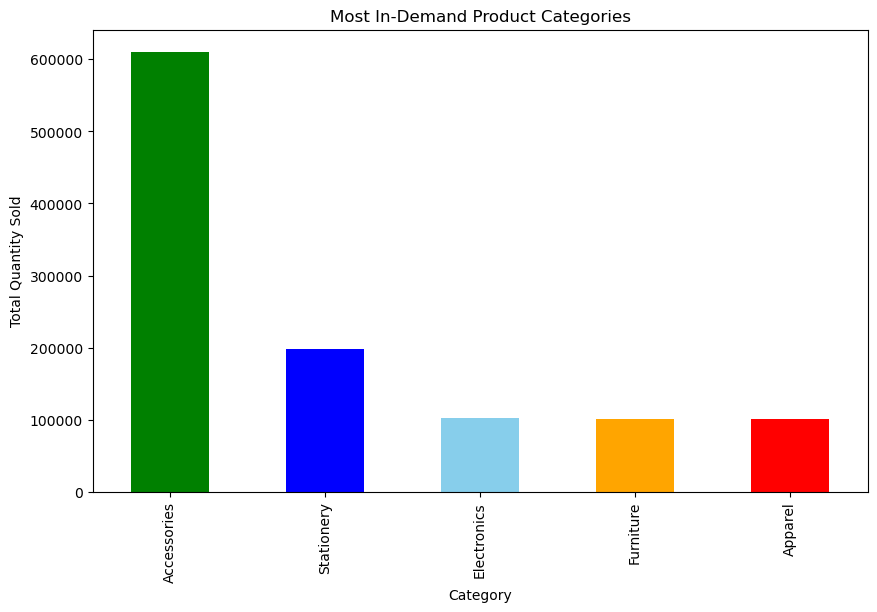

In [328]:
colors = ['green', 'blue', 'skyblue', 'orange', 'red']

most_in_demand['Quantity'].plot(
    kind='bar',
    title='Most In-Demand Product Categories',
    ylabel='Total Quantity Sold', 
    xlabel='Category',
    color=colors,
    figsize=(10,6)
)

In [329]:
#Aggregate quantity by product description
Purchase_by_description = df.groupby('Description').agg({'Quantity':'sum'}).sort_values(by='Quantity', ascending = False)
Purchase_by_description

,Quantity
Description,
USB Cable,103574
Backpack,103513
Wall Clock,102745
White Mug,102541
Desk Lamp,102474
Office Chair,101595
T-shirt,100842
Wireless Mouse,100389
Blue Pen,99447


<Axes: title={'center': 'Most In-Demand Product Description'}, xlabel='Description', ylabel='Total Quantity Sold'>

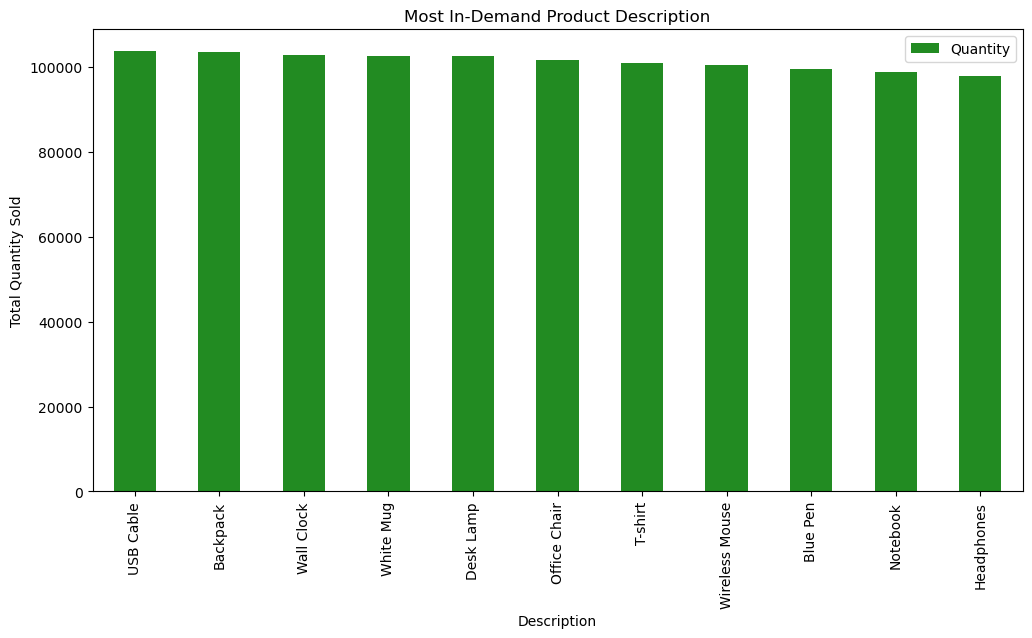

In [330]:
colors = ['forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'springgreen', 'mediumspringgreen', 
          'mediumaquamarine', 'aquamarine']

Purchase_by_description.plot(
    kind='bar',
    title='Most In-Demand Product Description',
    ylabel='Total Quantity Sold', 
    xlabel='Description',
    color=colors,
    figsize=(12,6)
)

In [331]:
#Add a Total sales column
df['Total Sales'] = (df['Unit Price'] - df['Discount']) * df['Quantity']

#Analyze sales by discount
sales_by_discount = df.groupby('Discount')['Total Sales'].sum()
print(sales_by_discount)

Discount
0.00     634677.91
0.01    1178593.97
0.02    1113686.80
0.03    1229976.14
0.04    1186958.01
           ...    
1.96      10257.00
1.97       4975.06
1.98      13276.47
1.99      18193.13
2.00       7667.96
Name: Total Sales, Length: 152, dtype: float64


<Axes: title={'center': 'Sales by Discount'}, xlabel='Discount', ylabel='Total Sales'>

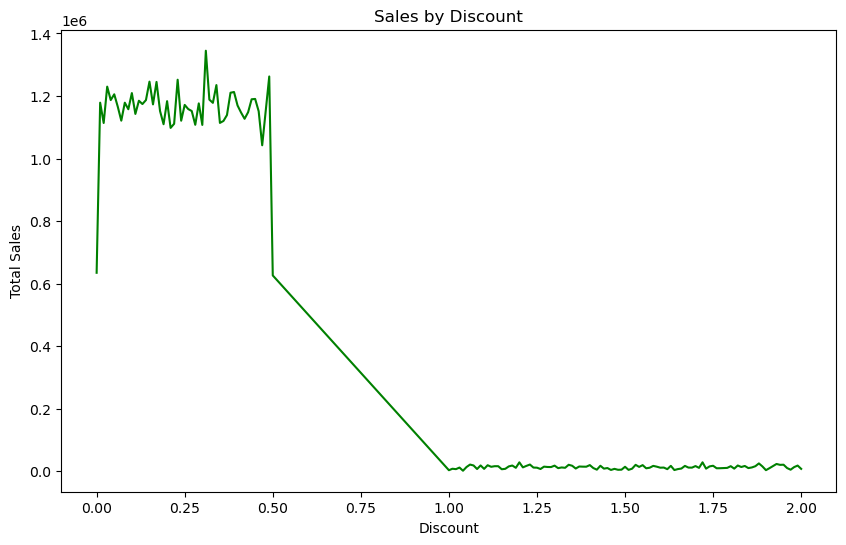

In [332]:
sales_by_discount.plot(kind='line', title='Sales by Discount',xlabel='Discount', ylabel='Total Sales', color='green', figsize=(10, 6))

In [371]:
sales_by_sales_channel = df.groupby('Sales Channel').agg({'Total Sales':'sum'}).sort_values(by='Total Sales', ascending = False)
print(sales_by_sales_channel)

               Total Sales
Sales Channel             
Online         30153723.97
In-store       29975081.75


In [333]:
# I use groupby function in pandas to calculate total sales by payment method, aggregate the result using sum(), and sort the result in descending order 
sales_by_payment_method = df.groupby('Payment Method').agg({'Total Sales':'sum'}).sort_values(by='Total Sales', ascending = False)
print(sales_by_payment_method)

                Total Sales
Payment Method             
Bank Transfer   20249847.75
Paypal          19844019.78
Credit Card     19801130.56


<Axes: title={'center': 'Total Sales by Payment Method'}, xlabel='Payment Method', ylabel='Total Sales'>

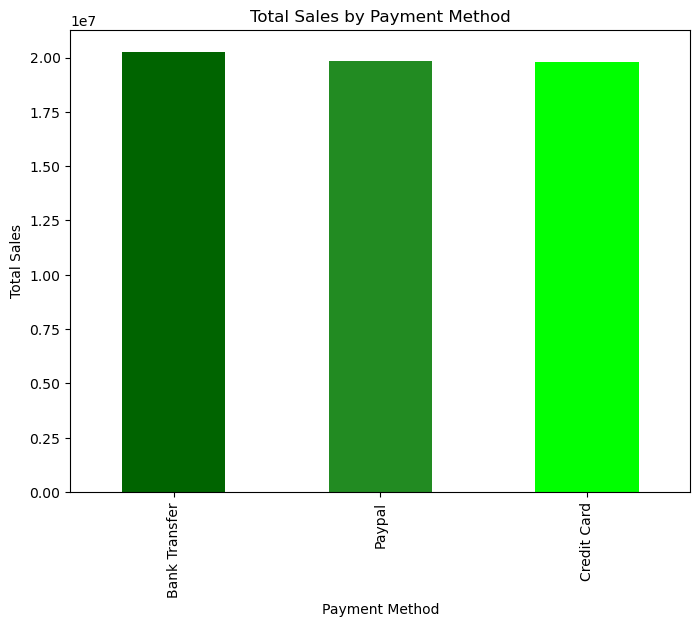

In [334]:
colors = ['darkgreen', 'forestgreen','lime']

sales_by_payment_method['Total Sales'].plot(
    kind='bar',
    title='Total Sales by Payment Method',
    ylabel='Total Sales', 
    xlabel='Payment Method',
    color=colors,
    figsize=(8,6)
)

In [335]:
# I use groupby function in pandas to calculate total sales by IsReturn, aggregate the result using sum(), and sort the result in descending order 
total_isreturn_rate = df.groupby('IsReturn')['Total Sales'].sum()
print(total_isreturn_rate)

IsReturn
No     59206852.12
Yes      688145.97
Name: Total Sales, dtype: float64


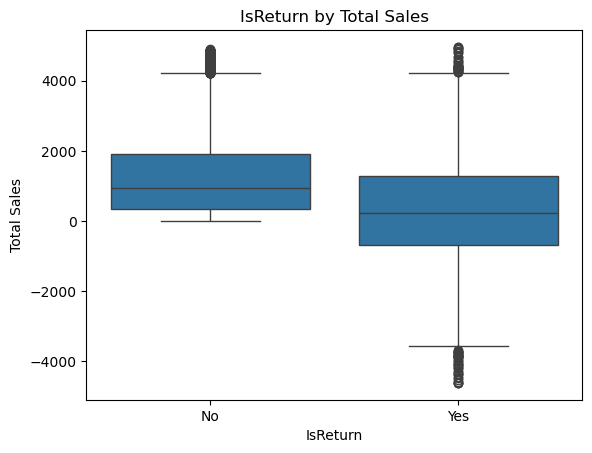

In [336]:
custom_palette = {
    0: 'green',
    1: 'lime'
}
sns.boxplot(x='IsReturn', y='Total Sales', data=df)
plt.title('IsReturn by Total Sales')
color='green'
plt.show()

In [ ]:
# Clean the 'Category' column by stripping whitespace and converting to lowercase
df['Category'] = df['Category'].str.strip().str.lower()

# Group by the cleaned 'Category' and calculate the total sales
total_sales_by_category = df.groupby('Category')['Total_Sales'].sum()

# Print the result
print(total_sales_by_category)


In [337]:
total_sales_by_category= df.groupby('Category')['Total Sales'].sum()
print(total_sales_by_category)


Category
Accessories    11998644.19
Apparel        11879729.28
Apparel              47.12
Electronics    11922986.52
Furniture      12185668.40
Stationery     11907922.58
Name: Total Sales, dtype: float64


In [367]:
# Clean the 'Category' column by stripping whitespace and converting to lowercase
df['Category'] = df['Category'].str.strip().str.lower()

# Group by the cleaned 'Category' and calculate the total sales
total_sales_by_category = df.groupby('Category')['Total Sales'].sum()
# Sort the sales by country in descending order
total_sales_by_category = total_sales_by_category.sort_values(ascending=False)


# Print the result
print(total_sales_by_category)


Category
furniture      12232496.46
accessories    12044622.87
electronics    11968350.39
stationery     11956080.61
apparel        11927255.39
Name: Total Sales, dtype: float64


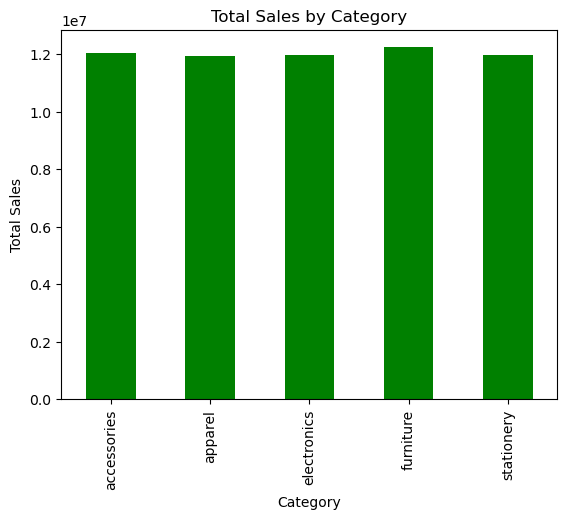

In [361]:
# Plotting the total sales by category
total_sales_by_category.plot(kind='bar', title='Total Sales by Category', color='green')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


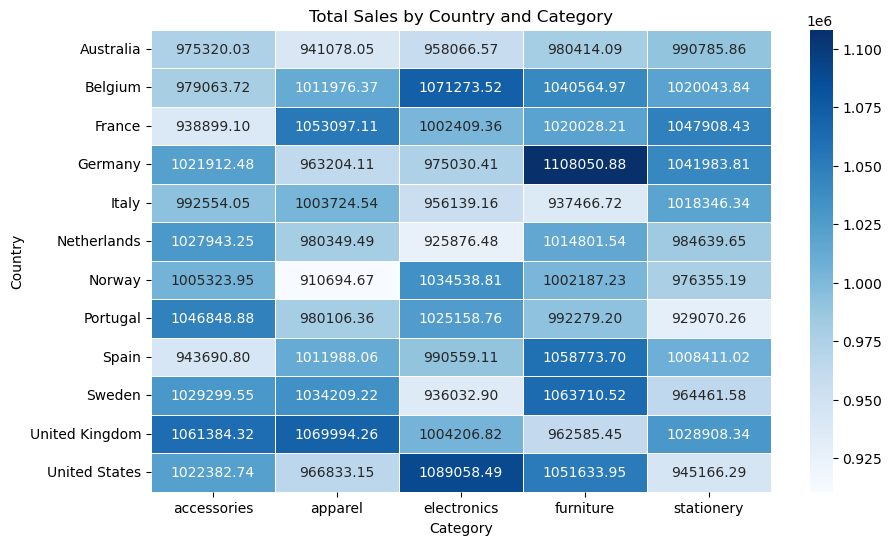

In [363]:

# Step 1: Calculate total sales
df['Total Sales'] = df['Quantity'] * df['Unit Price'] - df['Discount']

# Step 2: Group by Country and Category (optional) to prepare heatmap format
sales_pivot = df.pivot_table(values='Total Sales', index='Country', columns='Category', aggfunc='sum', fill_value=0)

# Step 3: Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sales_pivot, annot=True, fmt=".2f", cmap="Blues", linewidths=.5)
plt.title("Total Sales by Country and Category")
plt.xlabel("Category")
plt.ylabel("Country")
plt.show()


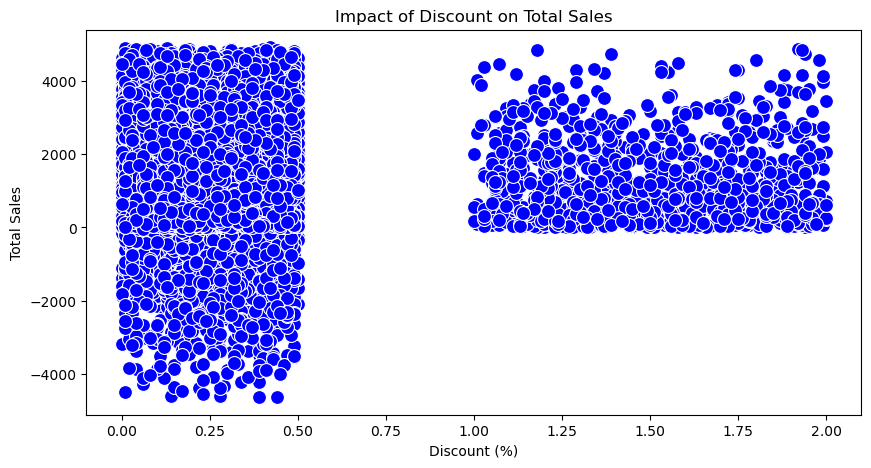

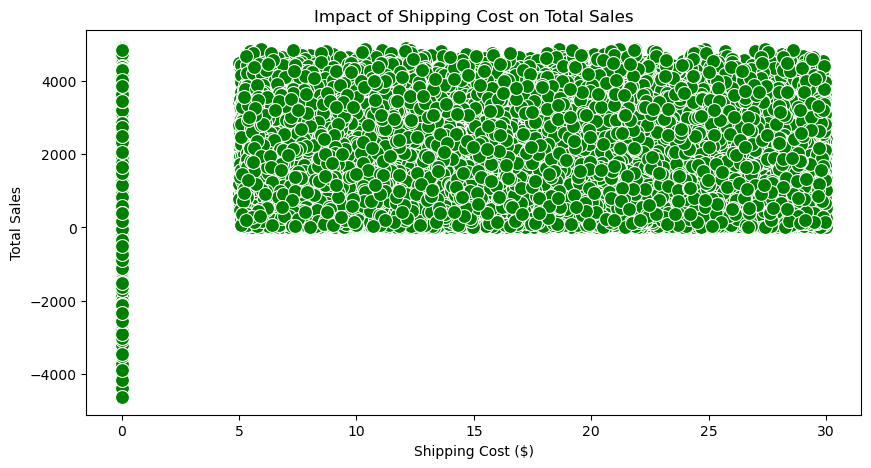

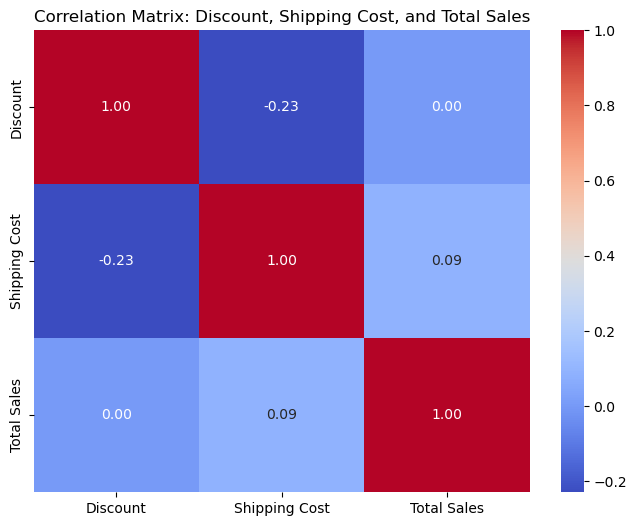

In [340]:
#How do discounts and shipping cost influence total sales
# Step 1: Calculate Total Sales
df['Total Sales'] = df['Quantity'] * df['Unit Price'] - df['Discount']

# Step 2: Correlation Analysis
correlation = df[['Discount', 'Shipping Cost', 'Total Sales']].corr()

# Step 3: Visualizations

# Scatter Plot for Discount vs Total Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Discount', y='Total Sales', data=df, color='blue', s=100)
plt.title('Impact of Discount on Total Sales')
plt.xlabel('Discount (%)')
plt.ylabel('Total Sales')
plt.show()

# Scatter Plot for Shipping Cost vs Total Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Shipping Cost', y='Total Sales', data=df, color='green', s=100)
plt.title('Impact of Shipping Cost on Total Sales')
plt.xlabel('Shipping Cost ($)')
plt.ylabel('Total Sales')
plt.show()

# Heatmap of Correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Discount, Shipping Cost, and Total Sales')
plt.show()


In [401]:

# Group by 'Shipping' method and calculate the sum of 'Total Sales' for each group
total_sales_by_shipping = df.groupby('Shipment Provider')['Total Sales'].sum()

# Sort the sales by country in descending order
total_sales_by_shipping_sorted = total_sales_by_shipping.sort_values(ascending=False)

# Display the result
print(total_sales_by_shipping_sorted)


Shipment Provider
FedEx         15168411.80
Royal Mail    15032885.12
DHL           14993296.21
UPS           14934212.59
Name: Total Sales, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_556\1562015033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Shipment Provider', y='Total Sales', data=df, palette='viridis')


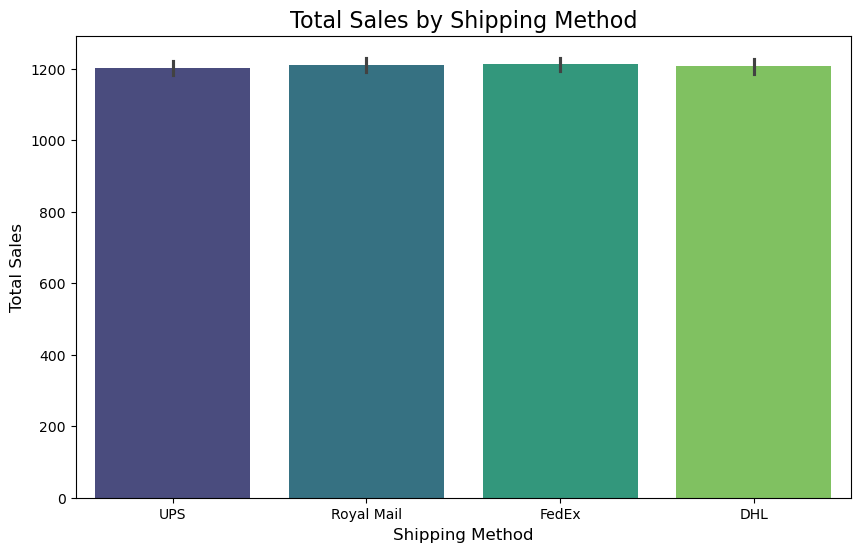

In [355]:

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Shipment Provider', y='Total Sales', data=df, palette='viridis')

# Add titles and labels
plt.title('Total Sales by Shipping Method', fontsize=16)
plt.xlabel('Shipping Method', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Display the plot
plt.show()


In [345]:

# Calculate total sales
df['total_sales'] = df['Quantity'] * df['Unit Price'] - df['Discount']

# Group by country and sum total sales
total_sales_by_country = df.groupby('Country')['total_sales'].sum()

# Sort the sales by country in descending order
total_sales_by_country_sorted = total_sales_by_country.sort_values(ascending=False)

# Display the result
print(total_sales_by_country_sorted)


Country
United Kingdom    5127079.19
Belgium           5122922.42
Germany           5110181.69
United States     5075074.62
France            5062342.21
Sweden            5027713.77
Spain             5013422.69
Portugal          4973463.46
Netherlands       4933610.41
Norway            4929099.85
Italy             4908230.81
Australia         4845664.60
Name: total_sales, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_556\1445596131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Sales', y='Country', data=df, palette='Greens')


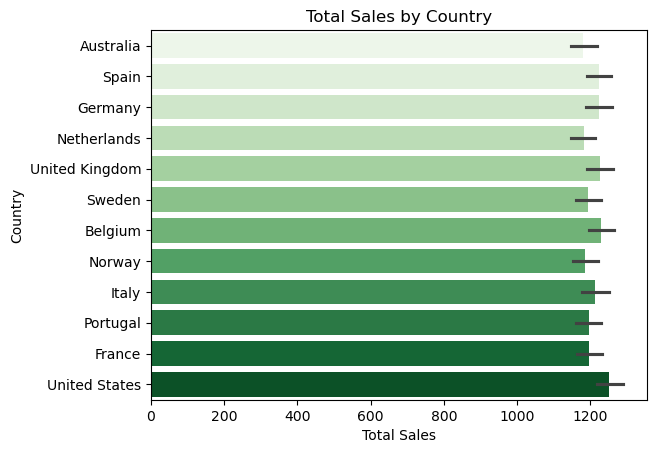

In [353]:
# Create the bar plot
sns.barplot(x='Total Sales', y='Country', data=df, palette='Greens')

# Set the title and labels
plt.title('Total Sales by Country')
plt.xlabel('Total Sales')
plt.ylabel('Country')

# Show the plot
plt.show()

In [403]:
sales_channel = df.groupby(['Sales Channel']).agg({'Total Sales': 'sum'}).sort_values(by='Total Sales', ascending=False)
print(sales_channel)

               Total Sales
Sales Channel             
Online         30153723.97
In-store       29975081.75


C:\Users\PC\AppData\Local\Temp\ipykernel_556\917414070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Sales', y= 'Sales Channel', data=df, palette='Greens')


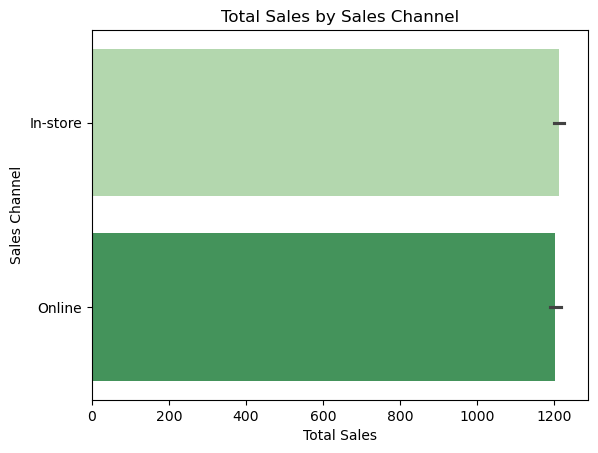

In [405]:
# Create the bar plot
sns.barplot(x='Total Sales', y= 'Sales Channel', data=df, palette='Greens')

# Set the title and labels
plt.title('Total Sales by Sales Channel')
plt.xlabel('Total Sales')
plt.ylabel('Sales Channel')

# Show the plot
plt.show()

In [383]:
payment_method_and_sales_channel = df.groupby(['Payment Method', 'Sales Channel']).agg({'Total Sales': 'sum'}).sort_values(by='Total Sales', ascending=False)
print(payment_method_and_sales_channel)


                              Total Sales
Payment Method Sales Channel             
Bank Transfer  Online         10260590.35
               In-store       10069694.15
Paypal         In-store       10013609.49
Credit Card    Online          9988020.60
Paypal         Online          9905113.02
Credit Card    In-store        9891778.11


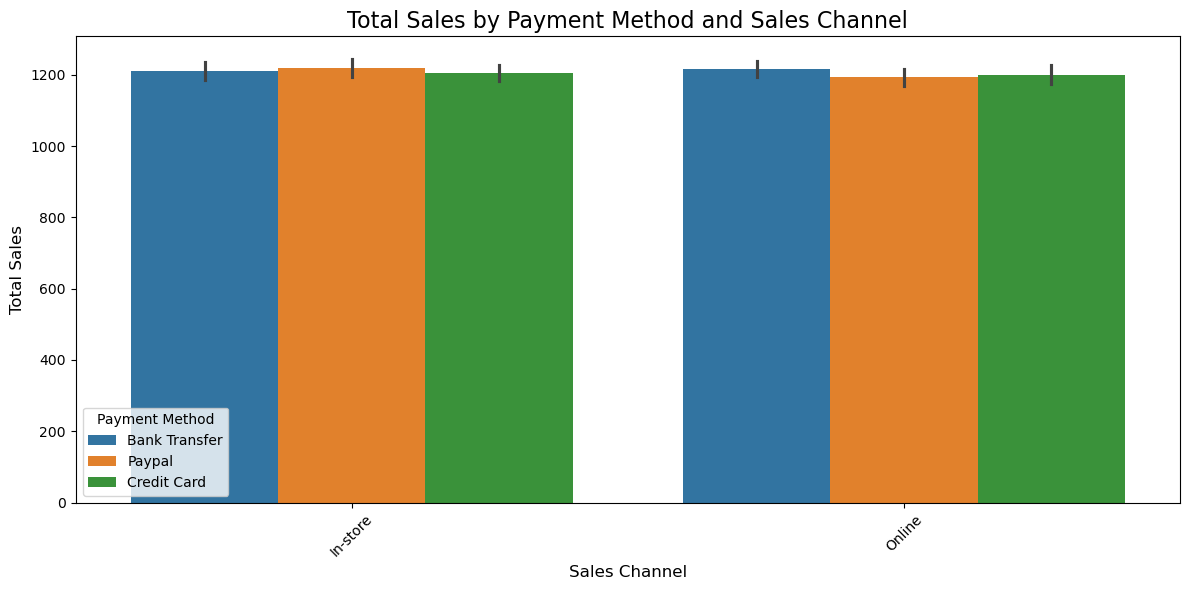

In [393]:
# Create a grouped bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x='Sales Channel',
    y='Total Sales',
    hue='Payment Method'
)

# Add labels, title, and legend
plt.title('Total Sales by Payment Method and Sales Channel', fontsize=16)
plt.xlabel('Sales Channel', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Payment Method', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
